In [ ]:
# What is the breakdown of experience levels across all data jobs?
## how is this change over time?
# what experience level will provide the best salary (on average)
# what are the top ten data jobs based on number of job_titles for by experience_level? 
##what are the statistical breakdowns for those?

In [1]:
# import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import pygwalker as pyg


In [2]:
# Loaded variable 'df' from URI: c:\Users\kskorna\Projects\Global_Data_Jobs-main\clean.csv
# read_in clean csv

df = pd.read_csv(r'c:\Users\kskorna\Projects\Global_Data_Jobs-main\clean.csv')
df_global_data_jobs_clean_data = df
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2024,Entry-level,Full-time,Data Analyst,20000,USD,20000,India,Remote,India,M
1,2024,Entry-level,Full-time,Data Reporting Analyst,58000,USD,58000,United States,In-person,United States,M
2,2024,Entry-level,Full-time,Data Reporting Analyst,42000,USD,42000,United States,In-person,United States,M
3,2024,Senior,Full-time,Data Manager,169680,USD,169680,United States,Remote,United States,M
4,2024,Senior,Full-time,Data Manager,113120,USD,113120,United States,Remote,United States,M
...,...,...,...,...,...,...,...,...,...,...,...
21297,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L
21298,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L
21299,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L
21300,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S


In [4]:
#check to confirm null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21302 entries, 0 to 21301
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           21302 non-null  datetime64[ns]
 1   experience_level    21302 non-null  object        
 2   employment_type     21302 non-null  object        
 3   job_title           21302 non-null  object        
 4   salary              21302 non-null  int64         
 5   salary_currency     21302 non-null  object        
 6   salary_in_usd       21302 non-null  int64         
 7   employee_residence  21302 non-null  object        
 8   work_setting        21302 non-null  object        
 9   company_location    21302 non-null  object        
 10  company_size        21302 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 1.8+ MB


In [3]:
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')
print(df.dtypes)

work_year             datetime64[ns]
experience_level              object
employment_type               object
job_title                     object
salary                         int64
salary_currency               object
salary_in_usd                  int64
employee_residence            object
work_setting                  object
company_location              object
company_size                  object
dtype: object


In [ ]:
# sorting down to 3 columns

df_subset = df[['experience_level', 'work_year', 'job_title']]
print(df_subset)

In [ ]:
# sorted experience levels per job title  

df_subset['job_title'].value_counts().head(4)



In [ ]:
top_four_job_titles = df_subset['job_title'].value_counts().head(4)
top_four_job_titles_df = top_four_job_titles.reset_index()
top_four_job_titles_df.columns = ['job_title', 'count']
top_four_job_titles_df

In [ ]:
df.groupby(['job_title', 'experience_level', 'work_year']).size().reset_index(name='count').head(4)

In [ ]:
df.groupby(['job_title', 'experience_level', 'work_year']).size().reset_index(name='count')


In [ ]:
top_four_job_titles = df_subset['job_title'].value_counts().nlargest(4).index.tolist()
grouped_data = df.groupby(['job_title', 'experience_level', "work_year"]).size().reset_index(name='count')
grouped_data


In [ ]:
grouped_data = df.groupby(['job_title', 'experience_level']).size().reset_index(name='count')
grouped_data

In [ ]:
top_four_job_titles = df_subset['job_title'].value_counts().nlargest(4).index.tolist()

# Filter the DataFrame to include only the top 4 job titles
subset_filtered = df_subset.loc[df_subset["job_title"].isin(top_four_job_titles)]

# Group by both "job_title" and "experience_level" columns
grouped_data = subset_filtered.groupby(["job_title", "experience_level", "work_year"]).size()
#Break down experience_level with in job title, per year
# Display the grouped data
print(grouped_data)

In [7]:
df_top_3 = df[df['job_title'].isin(['Data Scientist', 'Data Engineer', 'Data Analyst'])]
df_top_3['work_year'] = pd.to_datetime(df_top_3['work_year']).dt.year
df_top_3


C:\Users\kskorna\AppData\Local\Temp\ipykernel_43296\2276859299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_3['work_year'] = pd.to_datetime(df_top_3['work_year']).dt.year


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2024,Entry-level,Full-time,Data Analyst,20000,USD,20000,India,Remote,India,M
5,2024,Mid-level,Full-time,Data Scientist,235400,USD,235400,United States,In-person,United States,M
6,2024,Mid-level,Full-time,Data Scientist,209720,USD,209720,United States,In-person,United States,M
7,2024,Mid-level,Full-time,Data Scientist,235400,USD,235400,United States,Remote,United States,M
8,2024,Mid-level,Full-time,Data Scientist,209720,USD,209720,United States,Remote,United States,M
...,...,...,...,...,...,...,...,...,...,...,...
21293,2020,Mid-level,Full-time,Data Engineer,130800,USD,130800,Spain,Remote,United States,M
21295,2021,Mid-level,Full-time,Data Scientist,160000,SGD,119059,Singapore,Remote,Israel,M
21296,2021,Mid-level,Full-time,Data Engineer,24000,EUR,28369,Malta,Hybrid,Malta,L
21298,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L


<Axes: xlabel='job_title,experience_level'>

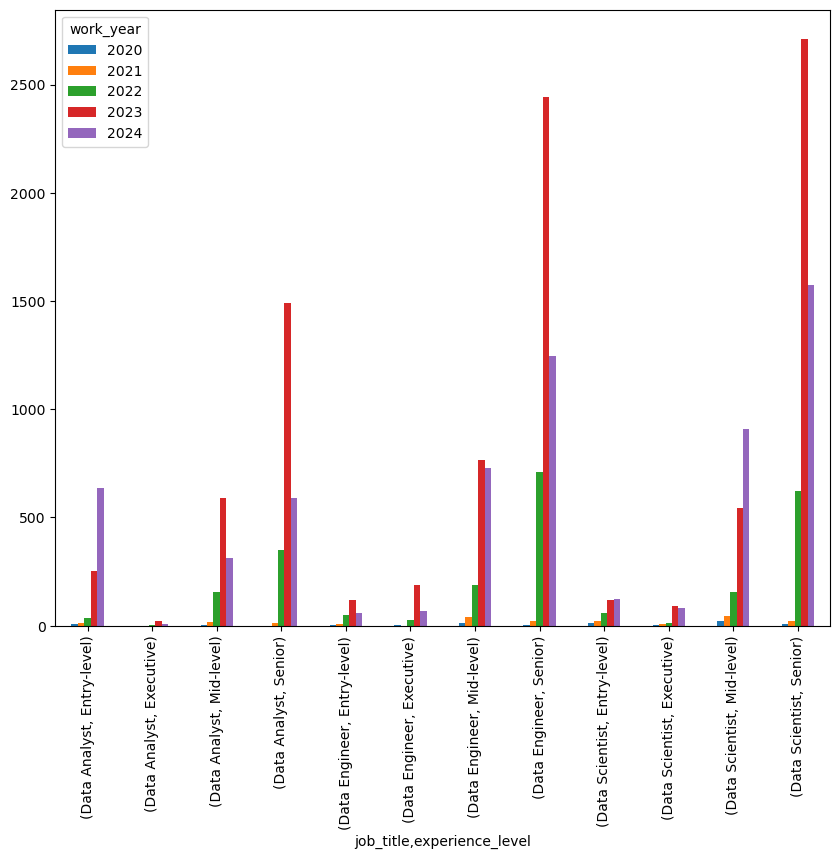

In [22]:
groupby_df = df_top_3.groupby(['work_year','experience_level','job_title']).size().reset_index(name= 'count')
pivoted_df = groupby_df.pivot_table(index='work_year', columns= ['job_title','experience_level'], values = 'count')

pivoted_df.T.plot(kind='bar', figsize=(10, 8))

In [ ]:
def group_by_experience_level(df_grouped_data):
    return df_grouped_data.groupby(['grouped_data', 'experience_level'])


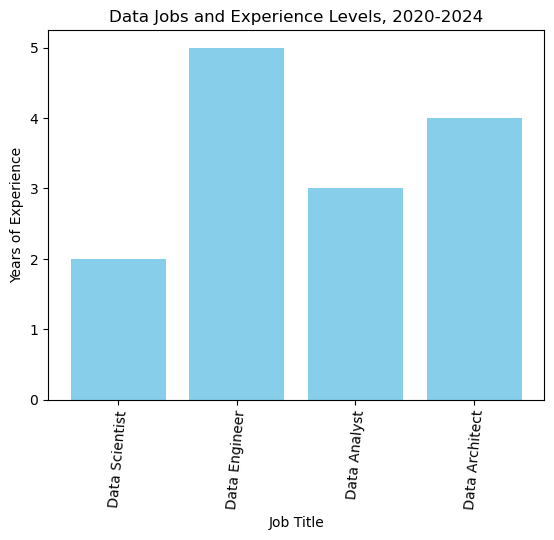

In [10]:
#def group_by_experience_level(df_grouped_data):
    #return df_grouped_data['experience_level'].groupby(['grouped_data', 'entry-level', 'mid-level', 'senior', 'executive'])
#x= df_grouped_data['experience_level'].groupby(['grouped_data', 'entry-level', 'mid-level', 'senior', 'executive'])
#y= df_grouped_data['work_year'].groupby(['grouped_data', 'work_year'])

# Sample data
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Data Architect']
experience_levels = [2, 5, 3, 4]  # Years of experience for each job title
work_year = [2020, 2021, 2022, 2023, 2024]

# Create a bar graph
plt.bar(job_titles, experience_levels, color='skyblue')

# Add labels and title
plt.xlabel('Job Title')
plt.ylabel('Years of Experience')
plt.title('Data Jobs and Experience Levels, 2020-2024')

# Rotate x-axis labels for better readability
plt.xticks(rotation=85)

# Display the plot
plt.show()

In [11]:
#Top 4 Job titles break down per year and experience level

df_subset.loc[df_subset["job_title"].isin(['Data Scientist', 'Data Engineer', 'Data Analyst', 'Data Architect'])]
subset_filtered = df_subset.loc[df_subset["job_title"].isin(['Data Scientist', 'Data Engineer', 'Data Analyst', 'Data Architect'])]
#subset_filtered = df_subset.loc[df_subset["experience_level"].iain(['Entry-Level', 'Senior'', 'Executive', 'Mid-Level'])
# Group by both "job_title" and "experience_level" columns
grouped_data = subset_filtered.groupby(["job_title", "experience_level", "work_year"]).size()

# Display the grouped data
#print(subset_filtered)
grouped_data

NameError: name 'df_subset' is not defined

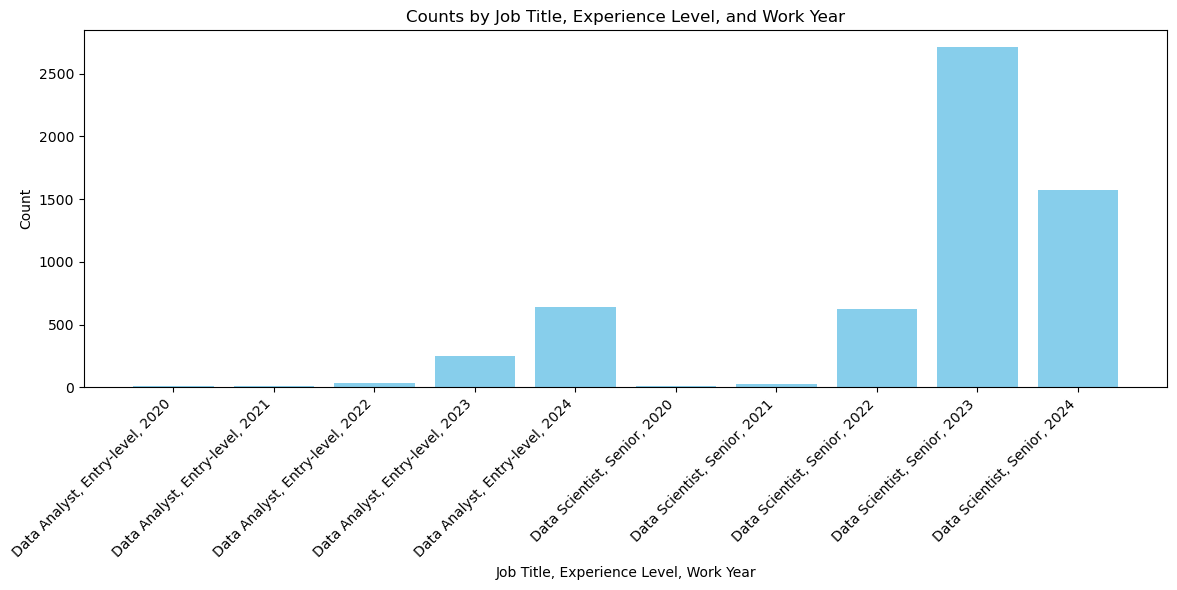

In [15]:
data = {
    ('Data Analyst', 'Entry-level', 2020): 8,
    ('Data Analyst', 'Entry-level', 2021): 12,
    ('Data Analyst', 'Entry-level', 2022): 34,
    ('Data Analyst', 'Entry-level', 2023): 252,
    ('Data Analyst', 'Entry-level', 2024): 638,
    ('Data Scientist', 'Senior', 2020): 9,
    ('Data Scientist', 'Senior', 2021): 23,
    ('Data Scientist', 'Senior', 2022): 624,
    ('Data Scientist', 'Senior', 2023): 2710,
    ('Data Scientist', 'Senior', 2024): 1573
}

# Extracting the data for plotting
job_titles = [key[0] for key in data.keys()]
experience_levels = [key[1] for key in data.keys()]
work_years = [key[2] for key in data.keys()]
counts = list(data.values())

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(data)), counts, color='skyblue')
plt.xlabel('Job Title, Experience Level, Work Year')
plt.ylabel('Count')
plt.xticks(range(len(data)), [f'{job_titles[i]}, {experience_levels[i]}, {work_years[i]}' for i in range(len(data))], rotation=45, ha='right')
plt.title('Counts by Job Title, Experience Level, and Work Year')
plt.tight_layout()
plt.show()

In [ ]:
grouped_data = grouped_data.reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(grouped_data)), grouped_data['count'])
plt.xlabel('Experience Levels')
plt.ylabel('Count')
plt.title('Counts of Job Title, Experience Level, and Work Year Combinations')
plt.xticks(range(len(grouped_data)), grouped_data['job_title'] + ' - ' + grouped_data['experience_level'] + ' - ' + grouped_data['work_year'], rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df_grouped_data
xpoints = np.array(['job_title', 'experience_level'])
ypoints = np.array([2020, 2022, 2023, 2024])
plt.plot(xpoints, ypoints)
plt.show


In [ ]:
pyg.walk(subset_filtered)

In [ ]:

df_grouped_data = pyg.walk
plt.show

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# plot
fig, ax = plt.subplots()

ax.stem(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()



In [ ]:
grouped_data = grouped_data.reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(grouped_data)), grouped_data['count'])
plt.xlabel('Combination Index')
plt.ylabel('Count')
plt.title('Counts of Job Title, Experience Level, and Work Year Combinations')
plt.xticks(range(len(grouped_data)), grouped_data['job_title'] + ' - ' + grouped_data['experience_level'] + ' - ' + grouped_data['work_year'], rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# combine job titles, split experince level for years 2020-2024 

# Create a sample DataFrame with job titles and experience levels
df_subset_filtered = {
    'Job Title': ['Data Scientist', 'Software Engineer', 'Product Manager'],
    'Experience Level': ['['entry-level', 'mid-level', 'executive', 'senior', 'entry-level']
'], 'year' : ['2020', '2021', '2022', '2023', '2024']
    }
df = pd.DataFrame(df_subset)

# Split the 'Experience Level' column into 'Years' using string manipulation
df['Years'] = df['Experience Level'].str.extract('(\d+)').astype(int)

# Combine 'Job Title' and 'Years' into a new column
df['Combined'] = df['Job Title'] + ' - ' + df['Years'].astype(str) + ' years'

# Display the updated DataFrame
print(df)

In [ ]:
# Data
work_year = [2020, 2021, 2022, 2023, 2024]
job_title = ['Azure Data Engineer', 'BI Data Analyst', 'Big Data Engineer', 'Big Data Engineer', 'Business Data Analyst']
experience_level = ['Entry-level', 'Mid-level', 'Executive', 'Senior', 'Entry-level']

# Create a bar graph
plt.figure(figsize=(10, 5))
plt.bar(job_title, work_year)

# Add labels and title
plt.xlabel('Job Title')
plt.ylabel('Work Year')
plt.title('Work Year by Job Title')

# Show the plot
plt.show()